In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



In [ ]:
import numpy as np

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines (3).csv


In [ ]:
import pandas as pd
import io
  
gas_turb = pd.read_csv(io.BytesIO(uploaded["gas_turbines.csv"]))



In [ ]:
gas_turb

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


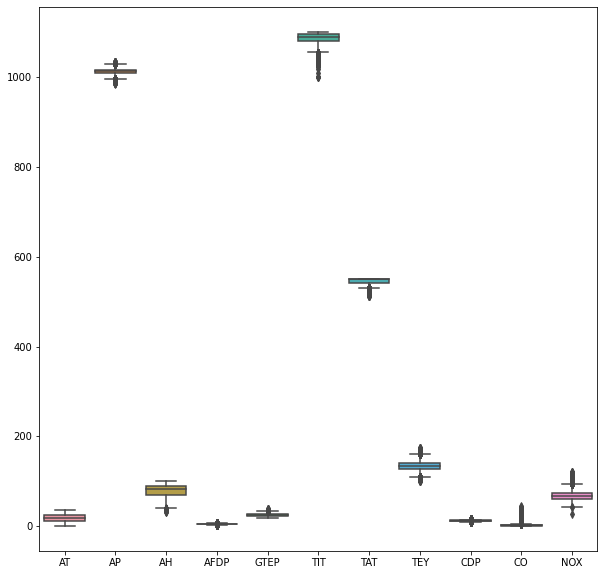

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(data=gas_turb)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <a list of 10 Patch objects>)

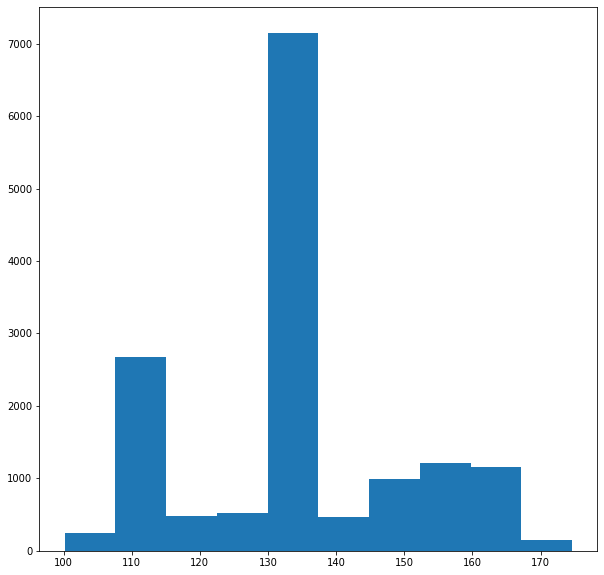

In [ ]:
import matplotlib.pyplot as plt

plt.hist(gas_turb["TEY"])

In [ ]:

gas_turb["class"]=np.where(gas_turb["TEY"]<130, 0, 1)

In [ ]:
gas_turb

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,class
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,0
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,0
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,0
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,0
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,0
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,0
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,0
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,0


In [ ]:
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing


# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
  model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
  return model

# load dataset
X =gas_turb.iloc[:,:7]
y =gas_turb.iloc[:,11:]
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(7, 1)
# fit the model on all data



In [ ]:

trainhist=model.fit(X, y, validation_split=0.33,epochs=150, batch_size=10,verbose=1)

Epoch 1/150
1008/1008 [==============================] - 2s 2ms/step - loss: 130.6107 - accuracy: 0.4277 - val_loss: 10.3576 - val_accuracy: 0.4592
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 9.9569 - accuracy: 0.4258 - val_loss: 10.2112 - val_accuracy: 0.5738
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: 6.7591 - accuracy: 0.4006 - val_loss: 4.5783 - val_accuracy: 0.3232
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: 4.8445 - accuracy: 0.3943 - val_loss: 3.0673 - val_accuracy: 0.3635
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 3.0914 - accuracy: 0.3991 - val_loss: 1.7552 - val_accuracy: 0.4427
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 2.0474 - accuracy: 0.4705 - val_loss: 0.7503 - val_accuracy: 0.4562
Epoch 7/150
1008/1008 [==============================] - 2s 2ms/step - loss: 1.2256 - accuracy: 0.5480 - val_loss: 0.6637 - va

In [ ]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 976us/step - loss: 0.2073 - accuracy: 0.9363
accuracy: 93.63%


In [ ]:
 #Visualize training history

# list all data in history
model.history.history.keys()


dict_keys([])

In [ ]:
import matplotlib.pyplot as plt

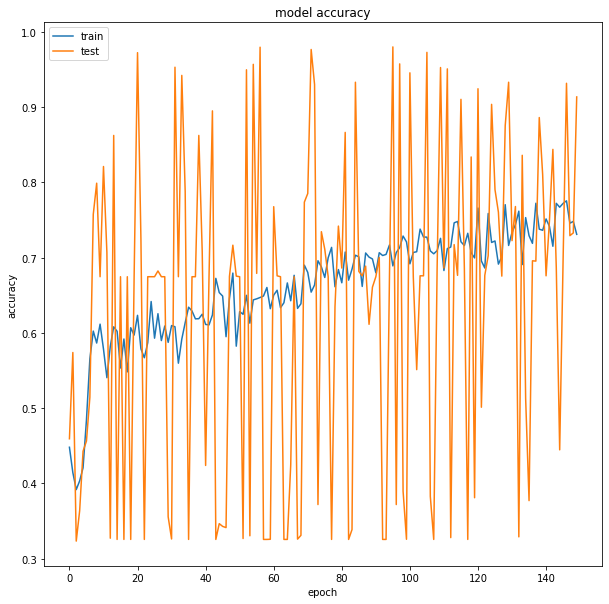

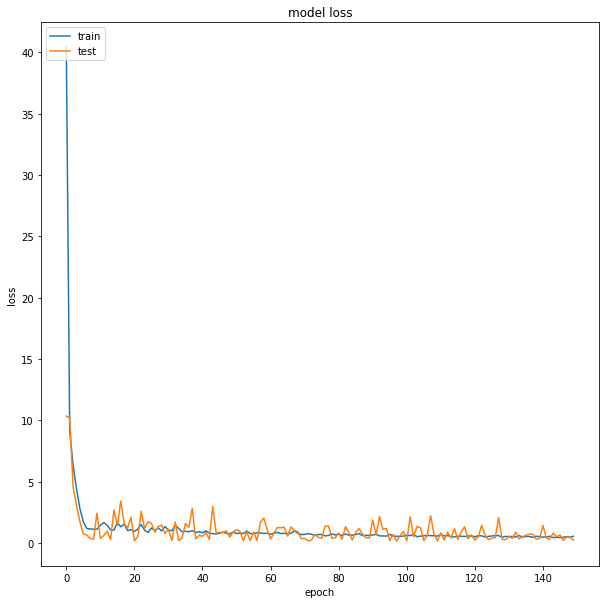

In [ ]:
# summarize history for accuracy
plt.plot(trainhist.history['accuracy'])
plt.plot(trainhist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trainhist.history['loss'])
plt.plot(trainhist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Hypertuning the nueral network

In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
Xh =gas_turb.iloc[:,:7]
yh =gas_turb.iloc[:,11:]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardization
a = StandardScaler()
a.fit(Xh)
X_standardized = a.transform(Xh)

#Tuning of Hyperparameters :- Batch Size and Epochs

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=7,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,20,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result =grid.fit(X_standardized,yh)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.993, total=  12.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.998, total=  12.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.994, total=  12.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.998, total=  12.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   50.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.997, total=  12.4s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.995, total=  23.8s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.998, total=  23.6s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.997, total=  23.6s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.998, total=  23.5s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.993, total=  23.7s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.996, total=  57.3s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.999, total=  58.3s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.996, total=  59.9s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.997, total=  59.4s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.998, total=  59.8s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.997, total=   6.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 14.3min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9977391839027405, using {'batch_size': 40, 'epochs': 20}
0.9961434483528138,0.00206642413780941 with: {'batch_size': 10, 'epochs': 10}
0.9961431622505188,0.0017922106088152164 with: {'batch_size': 10, 'epochs': 20}
0.9972737789154053,0.0010595949608615866 with: {'batch_size': 10, 'epochs': 50}
0.9966751575469971,0.0016427070251023314 with: {'batch_size': 20, 'epochs': 10}
0.9963428497314453,0.002322382509027068 with: {'batch_size': 20, 'epochs': 20}
0.9962762355804443,0.0015077871142873118 with: {'batch_size': 20, 'epochs': 50}
0.9968747138977051,0.0013399815884099096 with: {'batch_size': 40, 'epochs': 10}
0.9977391839027405,0.0009727160104413448 with: {'batch_size': 40, 'epochs': 20}
0.9968081593513489,0.0012373831123624495 with: {'batch_size': 40, 'epochs': 50}


Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 7,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim =7 ,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yh)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.996, total=   4.1s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.998, total=   3.4s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.998, total=   3.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.997, total=   3.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.996, total=   3.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.996, total=   3.4s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.997, total=   3.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.997, total=   3.6s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.995, total=   3.6s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.994, total=   3.5s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.997, total=   3.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.999, total=   3.4s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.998, total=   3.4s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.997, total=   3.4s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.996, total=   3.4s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.996, total=   3.5s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9972071766853332, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9971406936645508,0.0009774944150352097 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9960102677345276,0.0010518939022685085 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9972071766853332,0.0009071490208533425 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9969411492347717,0.0011973447916521311 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 7,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 7,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yh)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=0.994, total=   3.6s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.995, total=   3.6s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.997, total=   3.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.996, total=   3.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.995, total=   3.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.990, total=   3.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.2s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.996, total=   3.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.8s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.997, total=   3.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.3s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.996, total=   3.9s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.2s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.994, total=   3.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.994, total=   3.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.996, total=   3.6s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.997, total=   3.6s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.996, total=   3.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.994, total=   3.5s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.996, total=   3.5s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.5min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9975396037101746, using {'activation_function': 'tanh', 'init': 'normal'}
0.9955449104309082,0.0012368243708372887 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9946139812469482,0.0026795332835841167 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9952788591384888,0.0012513896725874472 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9971407294273377,0.0009310553099329507 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9970741868019104,0.0008518096302247438 with: {'activation_function': 'relu', 'init': 'normal'}
0.7390058159828186,0.05940332234183723 with: {'activation_function': 'relu', 'init': 'zero'}
0.9974731087684632,0.0011823645736258948 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9975396037101746,0.0012371985508930674 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7390058159828186,0.05940332234183723 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9972071766853332,0.0009998674306711988 w

Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 7,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'tanh'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yh)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.990, total=   3.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.992, total=   3.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.986, total=   3.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.995, total=   3.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.986, total=   3.5s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.993, total=   3.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.995, total=   3.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.997, total=   3.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.994, total=   3.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   31.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.995, total=   3.5s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.995, total=   3.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.997, total=   3.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.998, total=   3.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.997, total=   3.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.995, total=   3.4s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.989, total=   3.4s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.6min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.996409273147583, using {'neuron1': 4, 'neuron2': 8}
0.9897596836090088,0.003503009476142888 with: {'neuron1': 4, 'neuron2': 2}
0.9950129628181458,0.00131307045022848 with: {'neuron1': 4, 'neuron2': 4}
0.996409273147583,0.0011008925143488834 with: {'neuron1': 4, 'neuron2': 8}
0.9906904578208924,0.003974359975712753 with: {'neuron1': 8, 'neuron2': 2}
0.9942815065383911,0.0015650348470861459 with: {'neuron1': 8, 'neuron2': 4}
0.9955449342727661,0.0010428079203300643 with: {'neuron1': 8, 'neuron2': 8}
0.9941484451293945,0.0018042022534286608 with: {'neuron1': 16, 'neuron2': 2}
0.9958107829093933,0.0011052610341465304 with: {'neuron1': 16, 'neuron2': 4}
0.9954783082008362,0.002231452419751069 with: {'neuron1': 16, 'neuron2': 8}


#### Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 7,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 7,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'tanh'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss ='mae',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 20)

# Fitting the model

model.fit(X_standardized,yh)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(yh,y_predict))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9340381674313452


In [ ]:
gas_turb["y"]=yh
gas_turb["y_pred"]=y_predict

In [ ]:
gas_turb

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,class,y,y_pred
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,0,0,0
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,0,0,0
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,0,0,0
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,0,0,0
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,0,0,0
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,0,0,0
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,0,0,0
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,0,0,0
